# Пятое задание

In [26]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

In [34]:
def cdf_inverse(Fx, theta=10):
    if not isinstance(Fx, np.ndarray):
        raise ValueError("Fx должен быть массивом numpy.")
    if not (0 <= Fx).all() or not (Fx <= 1).all():
        raise ValueError("Все значения Fx должны быть в диапазоне [0, 1].")
    
    return ((Fx + 1) * theta).astype(float)

def generate_sample(n=100, theta=10, random_state=None):
    if n <= 0:
        raise ValueError("n должно быть положительным целым числом.")
    
    if random_state is not None:
        np.random.seed(random_state)
    
    Fx = np.random.sample(n)
    return cdf_inverse(Fx, theta)

# Генерация выборки и вывод результата
sample = generate_sample()
print('sample =', sample)

sample = [11.85635944 19.52791657 16.87488276 12.15507677 19.4737059  17.30855807
 12.53941643 12.13311977 15.18200714 10.25662718 12.07470075 14.24685469
 13.7416998  14.63575424 12.77628706 15.86784346 18.63855606 11.17531856
 15.17379107 11.32068106 17.16859681 13.96059703 15.65421312 11.83279836
 11.44847759 14.88056281 13.55612738 19.40431945 17.65325254 17.4866362
 19.0371974  10.83422435 15.5219247  15.84476069 19.61936379 12.92147527
 12.4082878  11.00293942 10.1642963  19.29529317 16.69916547 17.85152912
 12.81730106 15.86410166 10.63955266 14.85627596 19.7749514  18.76505245
 13.38158952 19.61570155 12.31701626 19.49318822 19.41377705 17.99202587
 16.30447937 18.74287967 12.93020285 18.48943555 16.17876692 10.13236858
 13.47233518 11.48140861 19.8182939  14.78370307 14.97391365 16.39472516
 13.68584606 11.36900272 18.22117733 11.89847912 15.11318983 12.24317029
 10.97844484 18.62191517 19.72919489 19.60834658 19.06555499 17.74047333
 13.33145152 10.8110139  14.07241171 12.322

## Доверительные интервалы

In [ ]:
def exact_confidence_interval(sample, beta=BETA, precision=3):
    x_max = np.max(sample)
    t1 = x_max / (((1+beta)/2) ** (1/np.size(sample)) + 1)
    t2 = x_max / (((1-beta)/2) ** (1/np.size(sample)) + 1)
    return round(t1, precision), round(t2, precision)


t1, t2 = exact_confidence_interval(sample)
print(f'Exact Confidence Interval = ({t1}, {t2})')

all_intervals.append((t1, t2))

Доверительный интервал: (48.61267900757858, 52.5834813031111)


Параметрический бутстрап

In [ ]:
num_bootstrap_samples = 1000
parametric_means = []
sample_mean = np.mean(sample)
sample_std = np.std(sample, ddof=1)

for _ in range(num_bootstrap_samples):
    bootstrap_sample = np.random.normal(loc=sample_mean, scale=sample_std, size=n)
    parametric_means.append(np.mean(bootstrap_sample))

parametric_lower = np.percentile(parametric_means, 2.5)
parametric_upper = np.percentile(parametric_means, 97.5)
parametric_confidence_interval = (float(parametric_lower), float(parametric_upper))

print(f"Доверительный интервал: {parametric_confidence_interval}")

Доверительный интервал: (48.63811715552369, 52.56447760235637)


Непараметрический бутстрап

In [28]:
nonparametric_means = []

for _ in range(num_bootstrap_samples):
    bootstrap_sample = np.random.choice(sample, size=n, replace=True)
    nonparametric_means.append(np.mean(bootstrap_sample))

nonparametric_lower = np.percentile(nonparametric_means, 2.5)
nonparametric_upper = np.percentile(nonparametric_means, 97.5)
nonparametric_confidence_interval = (float(nonparametric_lower), float(nonparametric_upper))

print(f"Доверительный интервал: {nonparametric_confidence_interval}")

Доверительный интервал: (48.73622335340759, 52.85747383341674)


## Сравнение

Параметрический бутстрап - Доверительный интервал: (48.63811715552369, 52.56447760235637)
Непараметрический бутстрап - Доверительный интервал: (49.94164482201375, 51.21692925144548)
Стандартный метод - Доверительный интервал: (48.61267900757858, 52.5834813031111)


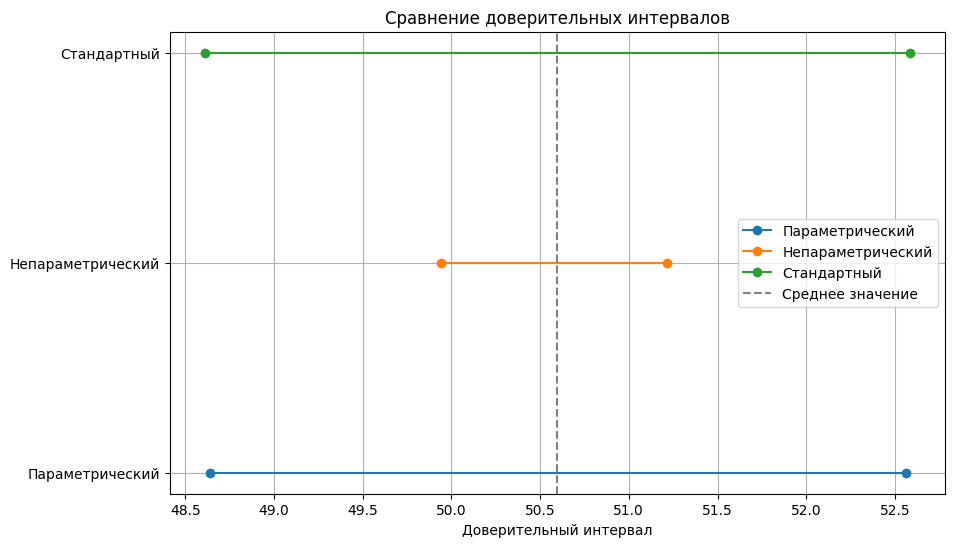

In [27]:
print(f"Параметрический бутстрап - Доверительный интервал: {parametric_confidence_interval}")
print(f"Непараметрический бутстрап - Доверительный интервал: {nonparametric_confidence_interval}")
print(f"Стандартный метод - Доверительный интервал: {confidence_interval}")

intervals = [parametric_confidence_interval, nonparametric_confidence_interval, confidence_interval]
labels = ['Параметрический', 'Непараметрический', 'Стандартный']

plt.figure(figsize=(10, 6))
for i, interval in enumerate(intervals):
    plt.plot(interval, [i, i], marker='o', label=labels[i])

plt.yticks(range(len(labels)), labels)
plt.title('Сравнение доверительных интервалов')
plt.xlabel('Доверительный интервал')
plt.axvline(x=sample_mean, color='gray', linestyle='--', label='Среднее значение')
plt.legend()
plt.grid()
plt.show()

# Шестое задание